In [1]:
from keras.layers import SimpleRNN


Using TensorFlow backend.


There is just one minor difference: SimpleRNN processes batches of sequences, like all other Keras layers, not just a single sequence like in our Numpy example. This means that it takes inputs of shape (batch_size, timesteps, input_features), rather than (timesteps, input_features).

Like all recurrent layers in Keras, SimpleRNN can be run in two different modes: it can return either the full sequences of successive outputs for each timestep (a 3D tensor of shape (batch_size, timesteps, output_features)), or it can return only the last output for each input sequence (a 2D tensor of shape (batch_size, output_features)). These two modes are controlled by the return_sequences constructor argument. Let's take a look at an example:

In [3]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [4]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


#### Below example is how to stack several recurrent layers one after the other in order to increase representational power of a network. 

In such a setup, you have to get all intermediate layers to return full sequences (return_sequences = TRUE)

In [5]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # This last layer only returns the last outputs.
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


##### USING SIMPLERNN FOR IMDB MOVIE CLASSIFICATION PROBLEM

In [62]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')


Loading data...
25000 train sequences
25000 test sequences


In [63]:
input_train.shape

(25000,)

In [64]:
len(input_train[2])

j = 0
for i in range(len(input_train)):
    k = len(input_train[i])
    if k > j: 
        j = k
        print("found length in index ",i, "as length =", j)


print(j)

found length in index  0 as length = 218
found length in index  3 as length = 550
found length in index  7 as length = 562
found length in index  17 as length = 752
found length in index  23 as length = 888
found length in index  107 as length = 975
found length in index  114 as length = 1038
found length in index  2453 as length = 1629
found length in index  3972 as length = 1851
found length in index  13494 as length = 1854
found length in index  17934 as length = 2494
2494


In [71]:
input_train[17934]

[1,
 1014,
 300,
 4349,
 768,
 2702,
 1014,
 2,
 1538,
 5,
 3483,
 5934,
 1918,
 1812,
 2,
 5,
 1378,
 9125,
 2,
 1538,
 5,
 3483,
 5934,
 645,
 183,
 125,
 19,
 6,
 4349,
 768,
 2702,
 1014,
 429,
 1812,
 2,
 5,
 1378,
 9125,
 1793,
 8,
 4,
 2269,
 7,
 4,
 1014,
 199,
 9149,
 28,
 8,
 140,
 143,
 8915,
 11,
 661,
 8,
 79,
 4,
 1176,
 9125,
 5,
 2,
 2,
 56,
 402,
 23,
 34,
 656,
 505,
 2,
 86,
 3483,
 5,
 95,
 2,
 1538,
 6,
 1124,
 2,
 34,
 9125,
 8,
 2,
 562,
 4,
 1933,
 46,
 7,
 4,
 5934,
 597,
 3483,
 805,
 8,
 339,
 27,
 597,
 21,
 4,
 2,
 6075,
 90,
 137,
 9125,
 5,
 2,
 2,
 56,
 23,
 90,
 11,
 4,
 3130,
 19,
 9125,
 2,
 245,
 23,
 2,
 2,
 270,
 56,
 6,
 2702,
 1005,
 3483,
 2,
 83,
 4,
 1746,
 5,
 2,
 120,
 4,
 350,
 5836,
 1646,
 2,
 23,
 4,
 1005,
 103,
 9026,
 5,
 656,
 459,
 7,
 3483,
 2,
 9491,
 6,
 2702,
 83,
 4,
 1746,
 5,
 1678,
 4,
 2,
 270,
 12,
 56,
 4,
 2,
 95,
 270,
 56,
 18,
 6,
 1405,
 2,
 39,
 4,
 655,
 5836,
 63,
 62,
 28,
 276,
 2,
 143,
 4,
 2702,
 21,
 3483,
 

here in the above for loop, i am demonstrating that the longest sequence of sub-lists in the 25000 lists in the input_train is in index 17934. That sub-list contains 2494 elements. Hence when we use sequence.pad_sequences() with a maxlen of 500, then we will be truncating such long lists to only first 500 elements (done below)

In [75]:

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [76]:
input_train[17394,:]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [9]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 13s 670us/step - loss: 0.6167 - acc: 0.6431 - val_loss: 0.4989 - val_acc: 0.7652
Epoch 2/10
20000/20000 [==============================] - 14s 680us/step - loss: 0.3896 - acc: 0.8382 - val_loss: 0.3607 - val_acc: 0.8534
Epoch 3/10
20000/20000 [==============================] - 13s 674us/step - loss: 0.2907 - acc: 0.8859 - val_loss: 0.4106 - val_acc: 0.8124
Epoch 4/10
20000/20000 [==============================] - 14s 680us/step - loss: 0.2310 - acc: 0.9118 - val_loss: 0.3937 - val_acc: 0.8218
Epoch 5/10
20000/20000 [==============================] - 13s 673us/step - loss: 0.1805 - acc: 0.9355 - val_loss: 0.4225 - val_acc: 0.8152
Epoch 6/10
20000/20000 [==============================] - 14s 683us/step - loss: 0.1378 - acc: 0.9513 - val_loss: 0.3844 - val_acc: 0.8486
Epoch 7/10
20000/20000

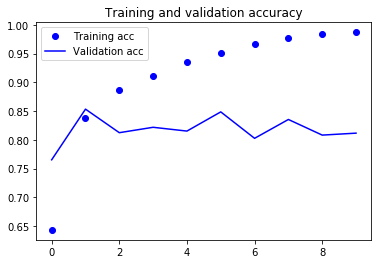

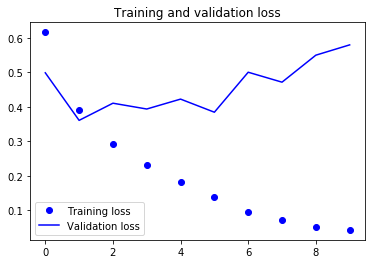

In [77]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### SCRATCH PAD below

In [79]:
import numpy as np


In [83]:
rows = np.random.randint(0 + 1440, 200000, size=128)

In [85]:
rows

array([  4882, 175304, 108218,  45850,  96062,  87421,  36072, 116171,
       162471,  41065, 196955, 136740,   9678, 116566, 118743, 119751,
        41631,  43599,  95427,  62160, 140544, 145012,  99778,  43014,
        92318,  81173, 197021,  53229, 115136, 185827, 172160,  42186,
        71550,  32374, 190029,   6954,  61605, 160317,  35316, 160859,
        26462, 130435, 164060, 130146, 115627,  33159, 166044,  40249,
        32355,  42409,  28858,  20988,   7010,  43362, 193037, 141687,
       164415,  71388, 192145, 106783, 160160, 136149, 138816, 100542,
       147426, 129958,  29136,  78508,  34062,  45390,  38100,  14479,
         4756,  56392, 141562,  95100,  49102, 134456, 146479,  59649,
        84150, 184354,  71396,  77359, 124836,  67815,  43515,  31754,
        50536, 119764, 187522, 185535,  52384,  79002,  13120,  68619,
       149618, 142509,  33050,   9363,  65816, 100864,  59527,  32848,
       110712, 127219,  47191, 192610, 123171, 172583, 174998,  17978,
      

In [86]:
1440 // 6

240

In [93]:
10//3

3